## Loop part

In [27]:
import os
import glob
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import xlsxwriter
from __future__ import unicode_literals

from tqdm import tqdm



path = Path().absolute()
extension = 'xls'
os.chdir(path)
result = [i for i in glob.glob('*.{}'.format(extension))]




# Create a Pandas dataframe from the data.





In [28]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Report.xlsx', engine='xlsxwriter')
workbook  = writer.book
#worksheet = workbook.add_worksheet()
cell_format = workbook.add_format({
                                   'align': 'center',
                                   'valign': 'vcenter',
                                   'border': 1,
                                    'bold': True,
                                    'fg_color': '#D7E4BC'})

col = 0
pointer = []
Square = {}

#Statistics

index_list = list()
framer = 0
col_name_stat = ['Fm.ср.знач.','Fm.ср.откл.','E.ср.знач.','E.ср.откл.','dL.ср.знач.','dL.ср.откл']
for k in result:
    index_list.append(k.split('.')[0])

statistic_frame = pd.DataFrame(data = None, index = index_list, columns = col_name_stat)

shaper = list()
    

    
for i in tqdm(result):
    
    dataframe = pd.read_excel(i, sheet_name = 1, encoding='windows-1251', sep =';')
    df = dataframe.iloc[1:,:]
    head_list = dataframe.columns
    col_pointer = len(head_list)+1
    pointer.append(col_pointer)
    shaper.append(dataframe.shape[0])
    
    dataframe.drop(columns = ['Fразруш.','dL при разруш.'], inplace = True)
    dataframe['FmaxN'] = str()
    dataframe['FmaxN'][0] = str('N')
    dataframe['FmaxN'][1:] = dataframe['Fmax'][1:]*dataframe['S0'][1:]
    dataframe['FmaxN'][1:] = dataframe['FmaxN'][1:].astype('float64')
    dataframe = dataframe[['FmaxN','Fmax','dL при Fмакс','Eмод','S0']]
    
    
    
    
    
    Mean_list = []
    Var_list = []
    Min_list = []
    Max_list = []

    for j in dataframe.columns:
        Mean_list.append(dataframe[j][1:].mean())
        Var_list.append(sum(abs(dataframe[j][1:] - dataframe[j][1:].mean()))/dataframe[j][1:].size)
        Min_list.append(dataframe[j][1:].min())
        Max_list.append(dataframe[j][1:].max())
        
    dataframe.loc['Ср.знач.'] = Mean_list
    dataframe.loc['Ср.откл.'] = Var_list
    dataframe.loc['Min'] = Min_list
    dataframe.loc['Max'] = Max_list
    
    #Strain Replacer

    #dataframe.drop(columns = ['Fразруш.','dL при разруш.'], inplace = True)
    #dataframe['FmaxN'] = str()
    #dataframe['FmaxN'][0] = str('N')
    #dataframe['FmaxN'][1:] = dataframe['Fmax'][1:]*dataframe['S0'][1:]
    #dataframe['FmaxN'][1:] = dataframe['FmaxN'][1:].astype('float64')
    #dataframe = dataframe[['FmaxN','Fmax','dL при Fмакс','Eмод','S0']]
    
    dataframe.to_excel(writer,sheet_name = 'Results_Summary', startrow= 4, startcol = 0 + col)
    
    Square_list = []
    
    for count in dataframe.iloc[1:-4,-1]:
        Square_list.append(count)
        
    Square[i] = Square_list
        
    
    col = col + 10
    
    statistic_frame.iloc[framer,:] = dataframe['Fmax'][-4], dataframe['Fmax'][-3],dataframe['Eмод'][-4],dataframe['Eмод'][-3],dataframe['dL при Fмакс'][-4],dataframe['dL при Fмакс'][-3]
    framer = framer + 1
    

#Input statistic
statistic_frame.to_excel(writer,sheet_name = 'Results_Summary', startrow= shaper[0] + 20, startcol = 0)
    
    

worksheet = writer.sheets['Results_Summary']

cell_format = workbook.add_format({
                                   'align': 'center',
                                   'valign': 'vcenter',
                                   'border': 1,
                                    'bold': True,
                                    'fg_color': '#D7E4BC',
                                    'text_wrap':True})

# We can only write simple types to merged ranges so we write a blank string.
col = 0
k = 0
for i in result:
    worksheet.merge_range(0,0+col,3,pointer[k]+col-2, "", cell_format)

# We then overwrite the first merged cell with a rich string. Note that we
# must also pass the cell format used in the merged cells format at the end.
    worksheet.write_rich_string(0,0+col,
                            i.split('.')[0],
                            cell_format)
    col = col + 10
    k = k+1
    
    
    
#Data Part

for i in tqdm(result):
    

    xls = pd.ExcelFile(i, on_demand = True)
    sheets = xls.sheet_names
    use_sheets = sheets[3:]
    counter = 0
    tabler = 0
    for j in use_sheets:
        dataframe_res = pd.read_excel(i, sheet_name = j, encoding='windows-1251', sep =';')
        dataframe_res.columns = dataframe_res.iloc[0,:]
        df = dataframe_res.iloc[2:,:]

        df['Напряжение'] = df.iloc[:,1]/Square[i][counter]
        #print(df.head())
        df.to_excel(writer,sheet_name = '%s'%i.split('.')[0][:30], startrow= 4, startcol = 0+tabler , index = None)

        worksheet = writer.sheets['%s'%i.split('.')[0][:30]]
        worksheet.merge_range(0,0+tabler,3,2+tabler, "", cell_format)

# We then overwrite the first merged cell with a rich string. Note that we
# must also pass the cell format used in the merged cells format at the end.
        worksheet.write_rich_string(0,0+tabler,
                            '%s'%(j),
                            cell_format)
        line_chart1 = workbook.add_chart({'type': 'scatter', 'subtype':'smooth_with_markers'})
        line_chart1.set_size({'width': 570, 'height': 350})



        #line_chart1.set_x_axis({'min':0})
        line_chart1.set_x_axis({'name':'ε,%',
                                'name_layout':{'x':0.9,'y':0.85},
                                'name_font' :{'bold': False, 'italic':False, 'size':16,'name':'TimesNewRoman'},'line':{'color':'black'},'min':0,'num_font':  {'name': 'TimesNewRoman', 'size': 14,
                                                      'major_gridlines': {'visible': 0}},
                                                     'major_tick_mark':'inside',
                                                    'minor_tick_mark':'inside'})
        line_chart1.set_y_axis({'name':'σ, Мпа',
                                'name_font' :{'bold': False, 'italic':False,'size':16,'name':'TimesNewRoman'},'line':{'color':'black'},'num_font':  {'name': 'TimesNewRoman', 'size': 14}, 
                                'major_gridlines': {'visible': 0},
                               'major_tick_mark':'inside',
                                'minor_tick_mark':'inside'})
        
        line_chart1.set_title({
    'name': '%s'%j,
    'name_font': {
        'name': 'TimesNewRoman',
        'color': 'black',
        'size' : 12,
        'bold':False,
        'italic':False
    }
})

# Configure the data series for the secondary chart.
        line_chart1.add_series({
    'categories': ['%s'%i.split('.')[0][:30], 5,0+tabler,5+df.shape[0],0+tabler],
    'values':     ['%s'%i.split('.')[0][:30], 5,2+tabler,5+df.shape[0],2+tabler],
    'line' :{'color':'black'},
    'marker':     {'type': 'circle','color':'black', 'size': 1},
    'num_format':'0,000',
    'smooth':     True,
    'data_labels':{'bold':False}
    
        })
        line_chart1.set_legend({'none': True})

#line_chart1.set_x_axis({'display_units': 'hundreds',
                  #'display_units_visible': False})

#line_chart1.set_x_axis({'interval_unit': 0.5})
#line_chart1.set_x_axis({'min':0,'max'})
#line_chart1.set_x_axis({'minor_unit': 0.4, 'major_unit': 2})

        worksheet.insert_chart(0,3+tabler, line_chart1)
        
        tabler = tabler + 12
        counter = counter +1
        
        

writer.save()

    

  0%|          | 0/3 [00:00<?, ?it/s]/home/workingcloud/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
100%|██████████| 3/3 [00:19<00:00,  6.61s/it]


In [27]:
statistic_frame

,Fm.ср.знач.,Fm.ср.откл.,E.ср.знач.,E.ср.откл.,dL.ср.знач.,dL.ср.откл
Растяжение_Ультрабазальт_1200_1-1,2687.14,1.50285e+06,1062.16,4.30848e+06,4.26233,0.124561
Растяжение_Базальтопластик_1200_1-1,2118.94,16852.8,77.3569,5.9196,4.26233,0.124561


In [21]:
xls = pd.ExcelFile(result[0], on_demand = True)
sheets = xls.sheet_names
use_sheets = sheets[3:]

In [6]:
dataframe.columns = dataframe.iloc[0,:]

In [7]:
dataframe = dataframe.iloc[2:,:]

In [8]:
dataframe.head()

,Деформация,Стандартное усилие
2,0,5.41065
3,-6.05589e-07,5.41369
4,-1.93304e-06,5.44224
5,0.00013448,5.2156
6,0.00167427,5.42144


In [43]:
dataframe = pd.read_excel(result[0], sheet_name = use_sheets[0], encoding='windows-1251', sep =';')

In [44]:
dataframe.columns = dataframe.iloc[0,:]

In [45]:
dataframe.iloc[2:,:].head()

,Деформация,Стандартное усилие
2,0,7.46483
3,-1.16758e-06,7.58638
4,6.15279e-07,7.61948
5,5.6126e-05,7.45212
6,0.00134849,7.82521


In [46]:
df = dataframe.iloc[2:,:]

In [47]:
df['Напряжение'] = df.iloc[:,1]/Square[result[0]][0]

/home/workingcloud/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
import openpyxl
wb = xlsxwriter.Workbook("Report2.xlsx")
#book = openpyxl.load_workbook('Report.xlsx')
writer = pd.ExcelWriter('Report2.xlsx', engine='xlsxwriter') 
#writer.book = book
df.to_excel(writer,sheet_name = 'Data_Summary', startrow= 4, startcol = 0 , index = None)
#worksheet = writer.sheet_name['Data_Summary']

writer.save()

In [53]:



#workbook  = Workbook('chart_combined.xlsx')

writer = pd.ExcelWriter('chart_combined.xlsx', engine='xlsxwriter') 

df.to_excel(writer,sheet_name = 'Data_Summary', startrow= 4, startcol = 0 , index = None)
workbook = writer.book
worksheet = writer.sheets['Data_Summary']


line_chart1 = workbook.add_chart({'type': 'line'})

# Configure the data series for the secondary chart.
line_chart1.add_series({
    'categories': ['Data_Summary', 5,0,5+df.shape[0],0],
    'values':     ['Data_Summary', 5,2,5+df.shape[0],2]
})

worksheet.insert_chart('E2', line_chart1)
writer.save()



In [160]:
df

,t,tmax,PR,Fmax,h,b,S0
Образец1,18.7373,21.8558,1248.65,1456.47,4.2,11.9,49.98
Образец2,18.8357,18.8357,1101.51,1101.51,4.3,10.2,43.86
Образец3,18.5754,18.5754,1096.94,1096.94,4.3,10.3,44.29


In [38]:
df.shape

(996, 3)

In [63]:
#workbook  = Workbook('chart_combined.xlsx')

from __future__ import unicode_literals

writer = pd.ExcelWriter('chart_combined.xlsx', engine='xlsxwriter') 

df.to_excel(writer,sheet_name = 'Data_Summary', startrow= 4, startcol = 0 , index = None)
workbook = writer.book
worksheet = writer.sheets['Data_Summary']


line_chart1 = workbook.add_chart({'type': 'scatter', 'subtype':'smooth_with_markers'})

line_chart1.set_size({'width': 570, 'height': 300})



        #line_chart1.set_x_axis({'min':0})
line_chart1.set_x_axis({'min':0,'name_font':{'bold':False, 'italic':False,'size':14},'num_font':  {'name': 'TimesNewRoman', 'size': 14},
                        'major_gridlines': {'visible': 0},
                         'minor_tick_mark':'inside',
                           'major_tick_mark':'inside'})
line_chart1.set_y_axis({'name_font':{'bold':False, 'italic':False,'size':14, 'name':'TimesNewRoman'},
                        'name_layout':{'x':0.05,'y':0.2},
                        'num_font':  {'name': 'TimesNewRoman', 'size': 14},'name': 'σ, Мпа', 'major_gridlines': {'visible': 0}})




#line_chart1.set_x_axis({'interval_unit': 2})

# Configure the data series for the secondary chart.
line_chart1.add_series({
    'categories': ['Data_Summary', 5,0,5+df.shape[0],0],
    'values':     ['Data_Summary', 5,2,5+df.shape[0],2],
    'line' :{'color':'black'},
    'marker':     {'type': 'circle', 'size': 1},
    'num_format':'0,000',
    'smooth':     True
})

#line_chart1.set_x_axis({'display_units': 'hundreds',
                  #'display_units_visible': False})

#line_chart1.set_x_axis({'interval_unit': 0.5})
#line_chart1.set_x_axis({'min':0,'max'})
#line_chart1.set_x_axis({'minor_unit': 0.4, 'major_unit': 2})

worksheet.insert_chart('E2', line_chart1)
writer.save()


/home/workingcloud/anaconda3/lib/python3.6/site-packages/xlsxwriter/chart.py:1216: UserWarning: Property 'rotation' allowed not in layout options
  warn("Property '%s' allowed not in layout options" % key)


Text(0.5,0,'$\\sigma$')

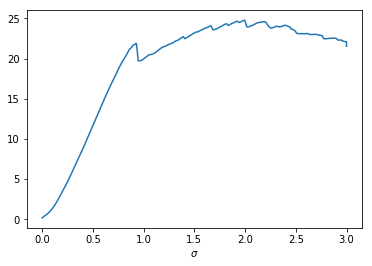

In [40]:
plt.plot(df.iloc[:,0], df.iloc[:,-1])
plt.xlabel('$\sigma$')

In [21]:
#dataframe.drop(['Fразруш.','dL при разруш.'],  inplace = True)
dataframe.drop(columns = ['Fразруш.','dL при разруш.'], inplace = True)

In [26]:
dataframe['FmaxN'].iloc[1,:] =  dataframe['Fmax'].iloc[1,:]*dataframe['S0'].iloc[1,:]

IndexingError: Too many indexers

In [30]:
dataframe['Fmax'].iloc[1:,:]

IndexingError: Too many indexers

In [40]:
dataframe['Fmax'][0]

'MPa'

In [47]:
dataframe['FmaxN'] = str()

In [48]:
dataframe['FmaxN'][0] = str('N')

In [53]:
dataframe['FmaxN'][1:] = dataframe['Fmax'][1:]*dataframe['S0'][1:]

In [55]:
dataframe['FmaxN'][1:] = dataframe['FmaxN'][1:].astype('float64')

In [61]:
dataframe = dataframe[['FmaxN','Fmax','dL при Fмакс','Eмод','S0']]

In [62]:
dataframe

,FmaxN,Fmax,dL при Fмакс,Eмод,S0
NaN,N,MPa,mm,GPa,mm^2
Образец1,987.292,2193.98,5.012,75.1319,0.45
Образец2,993.109,2113,4.00583,77.3001,0.47
Образец3,975.347,2167.44,4.46149,81.9515,0.45
Образец4,926.804,2059.56,4.082,74.7306,0.45
Образец5,981.559,2181.24,4.28434,76.5138,0.45
Образец6,800.267,1778.37,3.6308,75.172,0.45
Образец7,956.365,2125.25,4.17916,75.6705,0.45
Образец8,985.852,2190.78,4.27132,78.2644,0.45
Образец9,962.971,2139.94,4.34482,78.2608,0.45


In [65]:
#Strain Replacer

dataframe.drop(columns = ['Fразруш.','dL при разруш.'], inplace = True)
dataframe['FmaxN'] = str()
dataframe['FmaxN'][0] = str('N')
dataframe['FmaxN'][1:] = dataframe['Fmax'][1:]*dataframe['S0'][1:]
dataframe['FmaxN'][1:] = dataframe['FmaxN'][1:].astype('float64')
dataframe = dataframe[['FmaxN','Fmax','dL при Fмакс','Eмод','S0']]


In [66]:
dataframe

,FmaxN,Fmax,dL при Fмакс,Eмод,S0
NaN,N,MPa,mm,GPa,mm^2
Образец1,987.292,2193.98,5.012,75.1319,0.45
Образец2,993.109,2113,4.00583,77.3001,0.47
Образец3,975.347,2167.44,4.46149,81.9515,0.45
Образец4,926.804,2059.56,4.082,74.7306,0.45
Образец5,981.559,2181.24,4.28434,76.5138,0.45
Образец6,800.267,1778.37,3.6308,75.172,0.45
Образец7,956.365,2125.25,4.17916,75.6705,0.45
Образец8,985.852,2190.78,4.27132,78.2644,0.45
Образец9,962.971,2139.94,4.34482,78.2608,0.45


In [69]:
Square

{'Растяжение_Ультрабазальт_1200_1-1 .xls': [0.45,
  0.47,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45],
 'Растяжение_Базальтопластик_1200_1-1.xls': [0.45,
  0.47,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45,
  0.45]}

In [71]:
#Statisitcs Part

dataframe

,FmaxN,Fmax,dL при Fмакс,Eмод,S0
NaN,N,MPa,mm,GPa,mm^2
Образец1,987.292,2193.98,5.012,75.1319,0.45
Образец2,993.109,2113,4.00583,77.3001,0.47
Образец3,975.347,2167.44,4.46149,81.9515,0.45
Образец4,926.804,2059.56,4.082,74.7306,0.45
Образец5,981.559,2181.24,4.28434,76.5138,0.45
Образец6,800.267,1778.37,3.6308,75.172,0.45
Образец7,956.365,2125.25,4.17916,75.6705,0.45
Образец8,985.852,2190.78,4.27132,78.2644,0.45
Образец9,962.971,2139.94,4.34482,78.2608,0.45


In [1]:
col_name_stat = ['Fm.ср.знач.','Fm.ср.откл.','E.ср.знач.','E.ср.откл.','dL.ср.знач.','dL.ср.откл']

In [8]:
index_list = list()
index_list.append(result[0].split('.')[0])
index_list.append(result[1].split('.')[0])

In [10]:
statistic_frame = pd.DataFrame(data = None, index = index_list, columns = col_name_stat)

In [11]:
statistic_frame

,Fm.ср.знач.,Fm.ср.откл.,E.ср.знач.,E.ср.откл.,dL.ср.знач.,dL.ср.откл
Растяжение_Ультрабазальт_1200_1-1,NaN,NaN,NaN,NaN,NaN,NaN
Растяжение_Базальтопластик_1200_1-1,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
statistic_frame.iloc[1,:] = dataframe['Fmax'][-4], dataframe['Fmax'][-3],dataframe['Eмод'][-4],dataframe['Eмод'][-3],dataframe['dL при Fмакс'][-4],dataframe['dL при Fмакс'][-3]

In [19]:
statistic_frame.iloc[0,:] 

Fm.ср.знач.     2118.94
Fm.ср.откл.     16852.8
E.ср.знач.      77.3569
E.ср.откл.       5.9196
dL.ср.знач.     4.26233
dL.ср.откл     0.124561
Name: Растяжение_Ультрабазальт_1200_1-1 , dtype: object

In [22]:
statistic_frame

,Fm.ср.знач.,Fm.ср.откл.,E.ср.знач.,E.ср.откл.,dL.ср.знач.,dL.ср.откл
Растяжение_Ультрабазальт_1200_1-1,2118.94,16852.8,77.3569,5.9196,4.26233,0.124561
Растяжение_Базальтопластик_1200_1-1,2118.94,16852.8,77.3569,5.9196,4.26233,0.124561


In [33]:
shaper

[11, 11, 11]

In [34]:
shaper[0]

11

In [23]:
    dataframe = pd.read_excel('Растяжение_Базальтопластик_1200_1-1.xls', sheet_name = 1, encoding='windows-1251', sep =';')
    df = dataframe.iloc[1:,:]
    head_list = dataframe.columns
    col_pointer = len(head_list)+1
    pointer.append(col_pointer)
    shaper.append(dataframe.shape[0])
    
    dataframe.drop(columns = ['Fразруш.','dL при разруш.'], inplace = True)
    dataframe['FmaxN'] = str()
    dataframe['FmaxN'][0] = str('N')
    dataframe['FmaxN'][1:] = dataframe['Fmax'][1:]*dataframe['S0'][1:]
    dataframe['FmaxN'][1:] = dataframe['FmaxN'][1:].astype('float64')
    dataframe = dataframe[['FmaxN','Fmax','dL при Fмакс','Eмод','S0']]

In [24]:
dataframe

,FmaxN,Fmax,dL при Fмакс,Eмод,S0
NaN,N,MPa,mm,GPa,mm^2
Образец1,987.292,2193.98,5.012,75.1319,0.45
Образец2,993.109,2113,4.00583,77.3001,0.47
Образец3,975.347,2167.44,4.46149,81.9515,0.45
Образец4,926.804,2059.56,4.082,74.7306,0.45
Образец5,981.559,2181.24,4.28434,76.5138,0.45
Образец6,800.267,1778.37,3.6308,75.172,0.45
Образец7,956.365,2125.25,4.17916,75.6705,0.45
Образец8,985.852,2190.78,4.27132,78.2644,0.45
Образец9,962.971,2139.94,4.34482,78.2608,0.45


In [25]:
Mean_list = []
Var_list = []
Min_list = []
Max_list = []

for j in dataframe.columns:
    Mean_list.append(dataframe[j][1:].mean())
    Var_list.append(sum(abs(dataframe[j][1:] - dataframe[j][1:].mean()))/dataframe[j][1:].size)
    Min_list.append(dataframe[j][1:].min())
    Max_list.append(dataframe[j][1:].max())
        
dataframe.loc['Ср.знач.'] = Mean_list
dataframe.loc['Ср.откл.'] = Var_list
dataframe.loc['Min'] = Min_list
dataframe.loc['Max'] = Max_list
    

In [26]:
dataframe

,FmaxN,Fmax,dL при Fмакс,Eмод,S0
NaN,N,MPa,mm,GPa,mm^2
Образец1,987.292,2193.98,5.012,75.1319,0.45
Образец2,993.109,2113,4.00583,77.3001,0.47
Образец3,975.347,2167.44,4.46149,81.9515,0.45
Образец4,926.804,2059.56,4.082,74.7306,0.45
Образец5,981.559,2181.24,4.28434,76.5138,0.45
Образец6,800.267,1778.37,3.6308,75.172,0.45
Образец7,956.365,2125.25,4.17916,75.6705,0.45
Образец8,985.852,2190.78,4.27132,78.2644,0.45
Образец9,962.971,2139.94,4.34482,78.2608,0.45


In [13]:
dataframe['Fmax'][1:].std()

129.81833017511798

In [14]:
dataframe['FmaxN'][1:].mean()

957.7498413085938

In [15]:
dataframe

,FmaxN,Fmax,dL при Fмакс,Eмод,S0
NaN,N,MPa,mm,GPa,mm^2
Образец1,987.292,2193.98,5.012,75.1319,0.45
Образец2,993.109,2113,4.00583,77.3001,0.47
Образец3,975.347,2167.44,4.46149,81.9515,0.45
Образец4,926.804,2059.56,4.082,74.7306,0.45
Образец5,981.559,2181.24,4.28434,76.5138,0.45
Образец6,800.267,1778.37,3.6308,75.172,0.45
Образец7,956.365,2125.25,4.17916,75.6705,0.45
Образец8,985.852,2190.78,4.27132,78.2644,0.45
Образец9,962.971,2139.94,4.34482,78.2608,0.45


In [17]:
dataframe['FmaxN'][1:].mean()


957.7498413085938

In [20]:
dataframe['FmaxN'][1:].size

10

In [22]:
sum(abs(dataframe['FmaxN'][1:] - dataframe['FmaxN'][1:].mean()))/dataframe['FmaxN'][1:].size

37.96281982421876